In [164]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier

In [165]:
plt.rcParams['figure.figsize'] = [15,8]

In [166]:
df = pd.read_csv('Expense.csv')
df.head()

age      workclass      education  education-num       marital-status  \
0   39   Self-emp-inc      Bachelors             13   Married-civ-spouse   
1   20        Private   Some-college             10        Never-married   
2   50        Private      Doctorate             16   Married-civ-spouse   
3   38      State-gov        HS-grad              9   Married-civ-spouse   
4   23      Local-gov      Bachelors             13        Never-married   

         occupation relationship    race      sex  capital-gain  capital-loss  \
0   Exec-managerial      Husband   White     Male         15024             0   
1     Other-service    Own-child   White     Male             0             0   
2    Prof-specialty      Husband   White     Male             0          1902   
3    Prof-specialty         Wife   White   Female             0             0   
4    Prof-specialty    Own-child   White   Female             0             0   

   hours-per-week  native-country Expense  
0              50   United-States    >50K  
1              40   United-States   <=50K  
2              65   United-States    >50K  
3              40   United-States    >50K  
4              60   United-States   <=50K

In [167]:
df.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Expense           object
dtype: object

In [168]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Expense           0
dtype: int64

In [169]:
df.Expense.value_counts()

 <=50K    3776
 >50K     1224
Name: Expense, dtype: int64

In [170]:
df.Expense.unique()

array([' >50K', ' <=50K'], dtype=object)

In [171]:
df['Expense'].replace(to_replace=[' >50K', ' <=50K'], value=[1,0], inplace=True)

<AxesSubplot:xlabel='Expense', ylabel='count'>

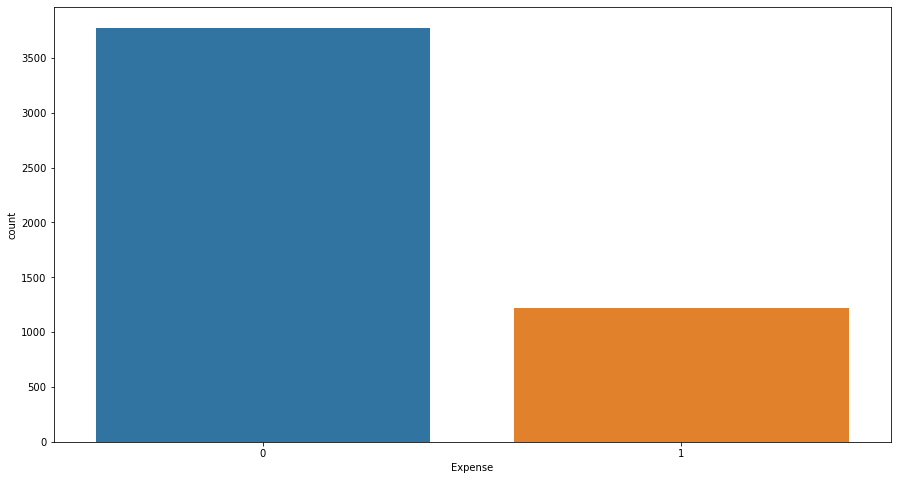

In [172]:
sns.countplot(df.Expense)

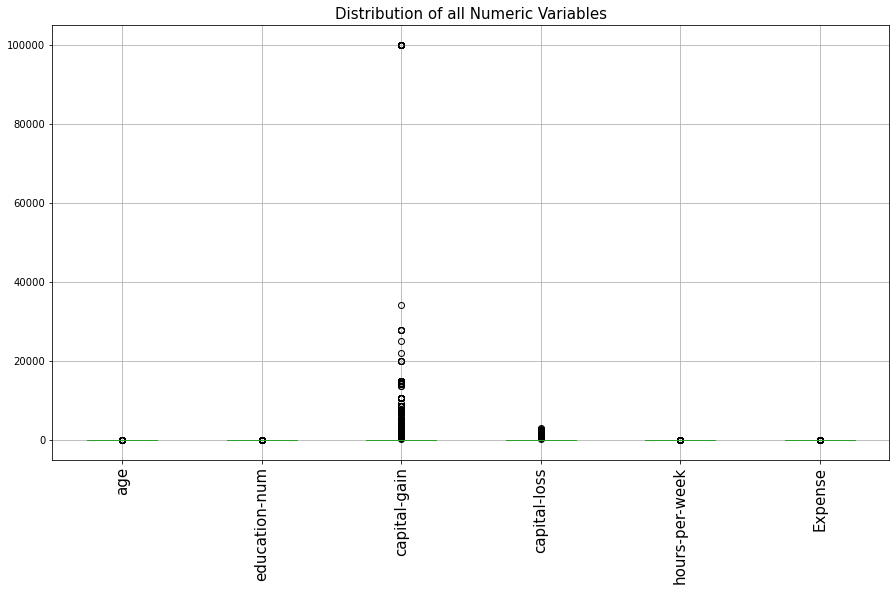

In [173]:
# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [174]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Expense'],
      dtype='object')

<AxesSubplot:xlabel='capital-loss'>

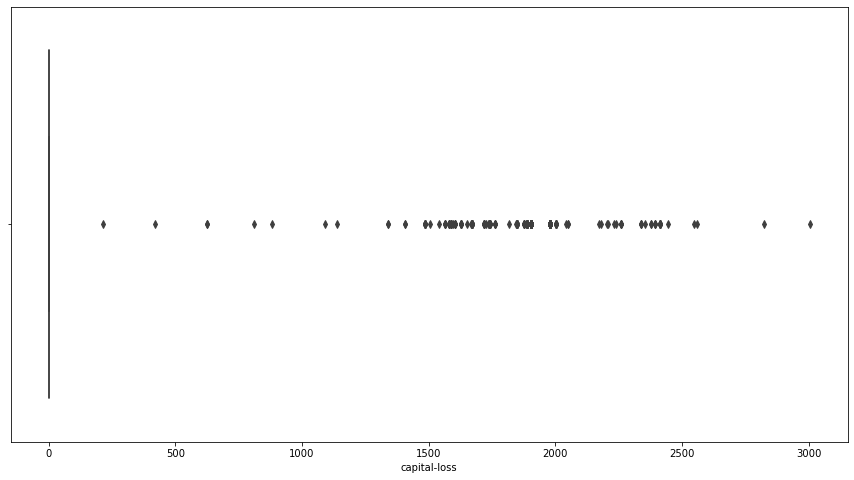

In [175]:
sns.boxplot(df['capital-loss'])

In [176]:
df.std()

age                13.698292
education-num       2.558141
capital-gain     7579.674371
capital-loss      404.168991
hours-per-week     12.154191
Expense             0.430012
dtype: float64

### workclass

In [177]:
df.workclass.unique()

array([' Self-emp-inc', ' Private', ' State-gov', ' Local-gov',
       ' Self-emp-not-inc', ' ?', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [178]:
df.workclass.value_counts()

 Private             3444
 Self-emp-not-inc     385
 ?                    320
 Local-gov            318
 State-gov            199
 Self-emp-inc         184
 Federal-gov          148
 Never-worked           1
 Without-pay            1
Name: workclass, dtype: int64

In [179]:
df[df['workclass']==' Without-pay']

age     workclass education  education-num marital-status  \
902   65   Without-pay   7th-8th              4        Widowed   

           occupation relationship    race      sex  capital-gain  \
902   Farming-fishing    Unmarried   White   Female             0   

     capital-loss  hours-per-week  native-country  Expense  
902             0              50   United-States        0

In [180]:
df[df['workclass']==' Never-worked']

age      workclass education  education-num  marital-status occupation  \
4362   18   Never-worked      10th              6   Never-married          ?   

     relationship    race    sex  capital-gain  capital-loss  hours-per-week  \
4362    Own-child   White   Male             0             0              40   

      native-country  Expense  
4362   United-States        0

In [181]:
# so we can drop the rows of **without-pay** and **never-worked**

In [182]:
#df = df.drop(index=[902,4362], axis=0)

In [183]:
df['workclass'].value_counts()

 Private             3444
 Self-emp-not-inc     385
 ?                    320
 Local-gov            318
 State-gov            199
 Self-emp-inc         184
 Federal-gov          148
 Never-worked           1
 Without-pay            1
Name: workclass, dtype: int64

<AxesSubplot:xlabel='workclass', ylabel='count'>

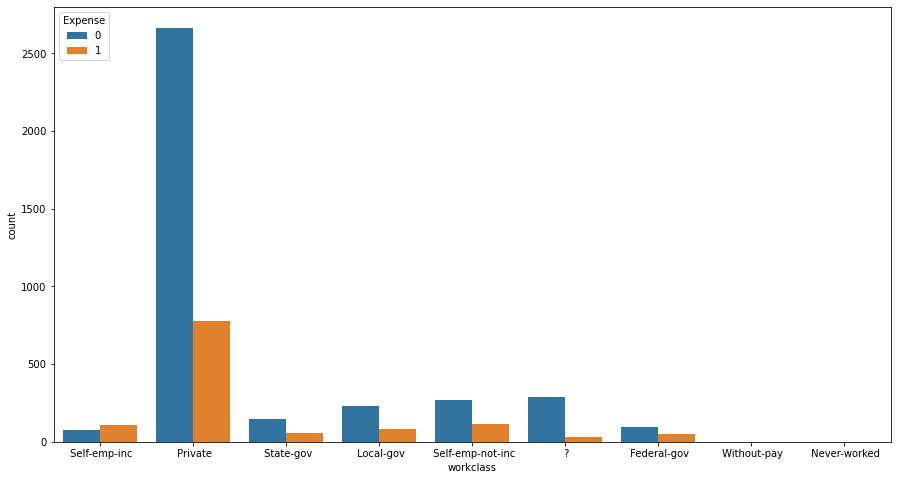

In [184]:
sns.countplot(df.workclass, hue=df.Expense)

In [185]:
df['workclass']=df['workclass'].replace([' State-gov', ' Local-gov',' Federal-gov'], 'govt')
df['workclass']=df['workclass'].replace([' Self-emp-inc',' Self-emp-not-inc', ' ?',' Without-pay',' Never-worked'], 'others')

<AxesSubplot:xlabel='workclass', ylabel='count'>

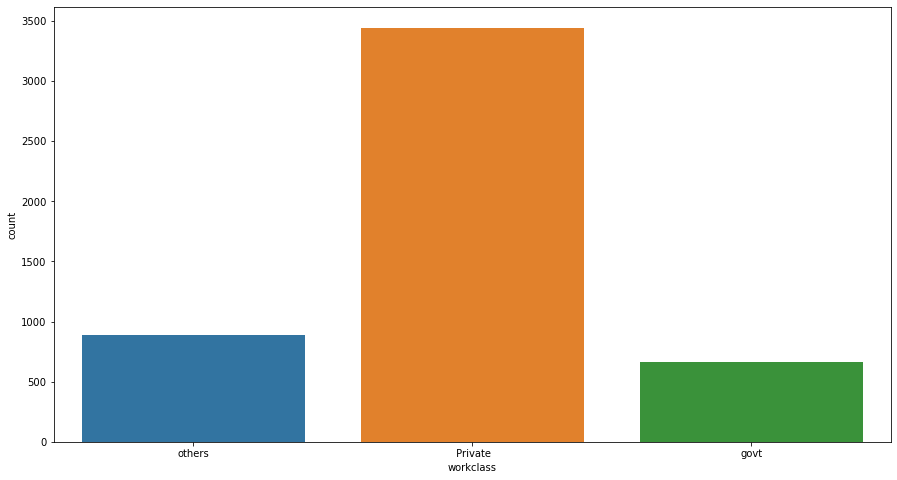

In [186]:
sns.countplot(df['workclass'])

### education

In [187]:
df.education.unique()

array([' Bachelors', ' Some-college', ' Doctorate', ' HS-grad',
       ' Assoc-voc', ' Masters', ' 7th-8th', ' 10th', ' Assoc-acdm',
       ' 9th', ' 11th', ' Prof-school', ' 12th', ' 1st-4th', ' 5th-6th',
       ' Preschool'], dtype=object)

In [188]:
df.education.value_counts()

 HS-grad         1602
 Some-college    1142
 Bachelors        823
 Masters          259
 Assoc-voc        214
 11th             179
 Assoc-acdm       157
 10th             156
 7th-8th          105
 Prof-school       90
 9th               84
 12th              57
 Doctorate         56
 5th-6th           46
 1st-4th           25
 Preschool          5
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

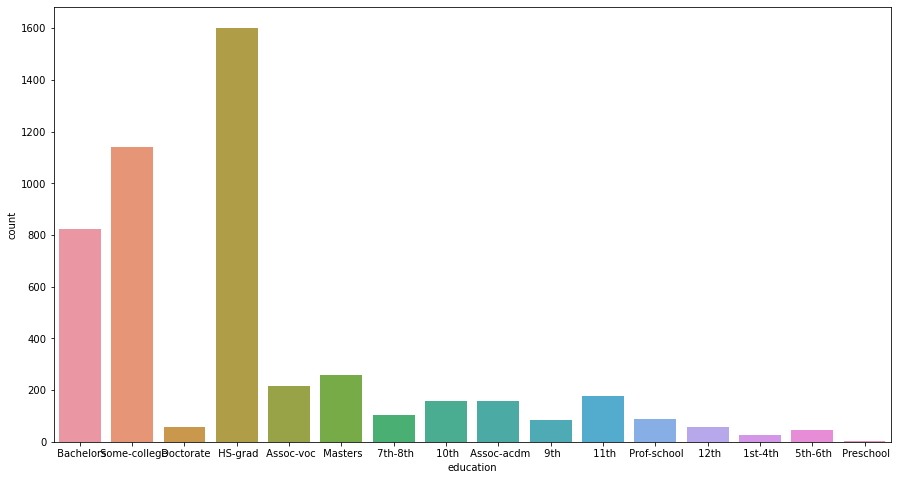

In [189]:
sns.countplot(df.education)

In [190]:
df[df['education']==' Prof-school']

age workclass     education  education-num       marital-status  \
46     28   Private   Prof-school             15             Divorced   
67     35   Private   Prof-school             15   Married-civ-spouse   
169    88    others   Prof-school             15   Married-civ-spouse   
220    38   Private   Prof-school             15   Married-civ-spouse   
230    75    others   Prof-school             15   Married-civ-spouse   
247    54    others   Prof-school             15   Married-civ-spouse   
304    36    others   Prof-school             15   Married-civ-spouse   
334    57   Private   Prof-school             15   Married-civ-spouse   
341    28      govt   Prof-school             15        Never-married   
460    41    others   Prof-school             15   Married-civ-spouse   
471    61   Private   Prof-school             15   Married-civ-spouse   
542    62   Private   Prof-school             15   Married-civ-spouse   
617    46   Private   Prof-school             15   Married-civ-spouse   
626    61    others   Prof-school             15   Married-civ-spouse   
645    55    others   Prof-school             15   Married-civ-spouse   
670    46   Private   Prof-school             15   Married-civ-spouse   
804    38    others   Prof-school             15   Married-civ-spouse   
913    52    others   Prof-school             15   Married-civ-spouse   
981    53      govt   Prof-school             15             Divorced   
1016   31   Private   Prof-school             15        Never-married   
1241   38      govt   Prof-school             15   Married-civ-spouse   
1280   29      govt   Prof-school             15        Never-married   
1362   26   Private   Prof-school             15   Married-civ-spouse   
1427   55    others   Prof-school             15   Married-civ-spouse   
1433   35   Private   Prof-school             15   Married-civ-spouse   
1508   59    others   Prof-school             15   Married-civ-spouse   
1616   74   Private   Prof-school             15              Widowed   
1660   26      govt   Prof-school             15   Married-civ-spouse   
1673   38   Private   Prof-school             15        Never-married   
1708   52    others   Prof-school             15   Married-civ-spouse   
1732   62   Private   Prof-school             15   Married-civ-spouse   
1797   47    others   Prof-school             15   Married-civ-spouse   
1834   58    others   Prof-school             15   Married-civ-spouse   
1841   44   Private   Prof-school             15        Never-married   
1842   45      govt   Prof-school             15             Divorced   
1860   40    others   Prof-school             15        Never-married   
1893   56   Private   Prof-school             15   Married-civ-spouse   
1910   55    others   Prof-school             15   Married-civ-spouse   
1934   29    others   Prof-school             15        Never-married   
2022   57   Private   Prof-school             15   Married-civ-spouse   
2028   42    others   Prof-school             15   Married-civ-spouse   
2041   50      govt   Prof-school             15        Never-married   
2051   57    others   Prof-school             15   Married-civ-spouse   
2081   40      govt   Prof-school             15   Married-civ-spouse   
2092   48   Private   Prof-school             15   Married-civ-spouse   
2106   46   Private   Prof-school             15   Married-civ-spouse   
2157   33   Private   Prof-school             15        Never-married   
2165   41   Private   Prof-school             15   Married-civ-spouse   
2176   36   Private   Prof-school             15             Divorced   
2225   57    others   Prof-school             15   Married-civ-spouse   
2285   27   Private   Prof-school             15   Married-civ-spouse   
2369   40    others   Prof-school             15   Married-civ-spouse   
2371   38   Private   Prof-school             15   Married-civ-spouse   
2396   61    others   Prof-school             15            Sepa

In [191]:
# we can categories all the school into one categories
#  7th-8th', ' 10th',' 9th', ' 11th', ' Prof-school', ' 12th', ' 1st-4th', ' 5th-6th',' Preschool' into SCHOOl

In [192]:
df['education']=df['education'].replace([' Prof-school',' 5th-6th',' 1st-4th',' 12th',' Preschool',' 7th-8th', ' 10th',
                                                          ' 9th', ' 11th'],'School')

In [193]:
df['education'].value_counts()

 HS-grad         1602
 Some-college    1142
 Bachelors        823
School            747
 Masters          259
 Assoc-voc        214
 Assoc-acdm       157
 Doctorate         56
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

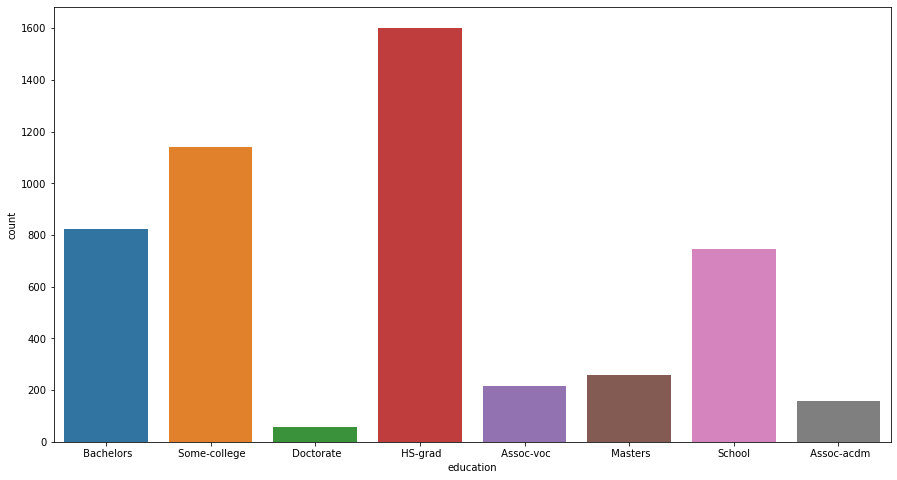

In [194]:
sns.countplot(df.education)

<AxesSubplot:xlabel='education', ylabel='count'>

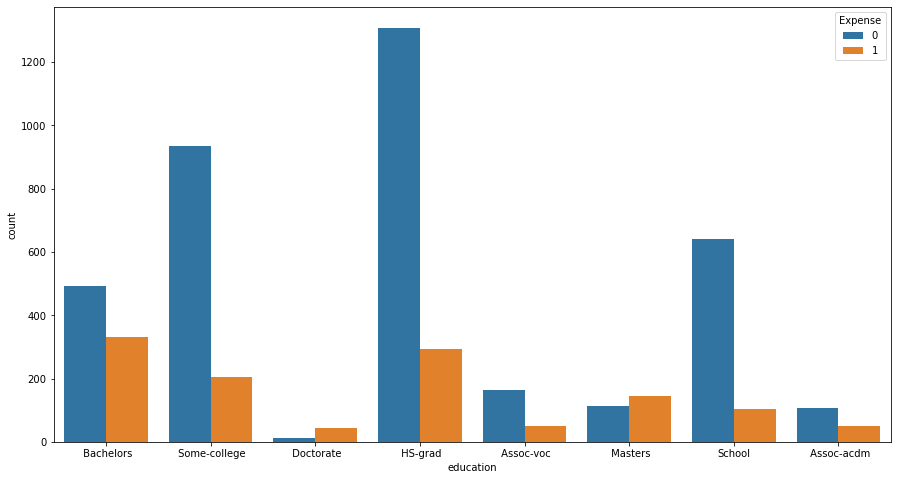

In [195]:
sns.countplot(df.education, hue=df.Expense)

<AxesSubplot:xlabel='education', ylabel='count'>

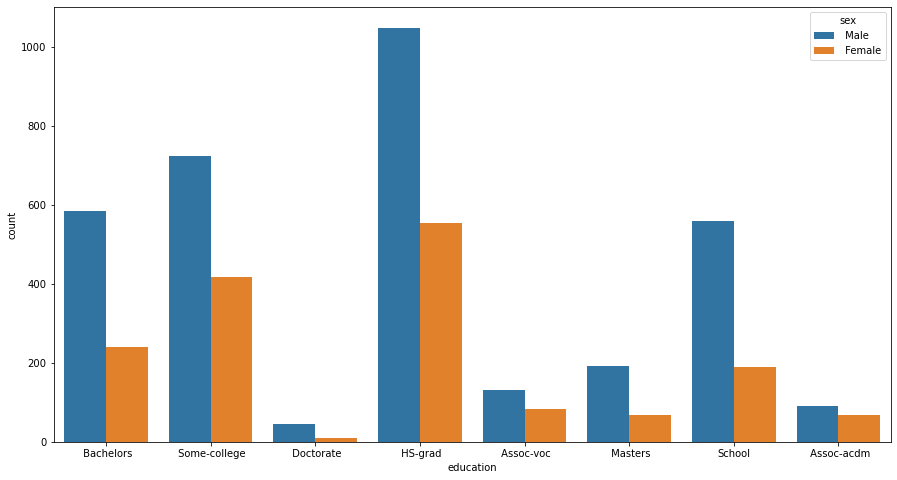

In [196]:
sns.countplot(df.education, hue=df.sex)

combining Doctorate & Master into single category Doct-Mast
combining Assoc-voc & Assoc-acdm into single category ASSOC

In [197]:
df['education'] = df['education'].replace([' Doctorate',' Masters'], 'Doct-Mast')
df['education'] = df['education'].replace([' Assoc-voc', ' Assoc-acdm'], 'ASSOC')

In [198]:
df.education.value_counts()

 HS-grad         1602
 Some-college    1142
 Bachelors        823
School            747
ASSOC             371
Doct-Mast         315
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

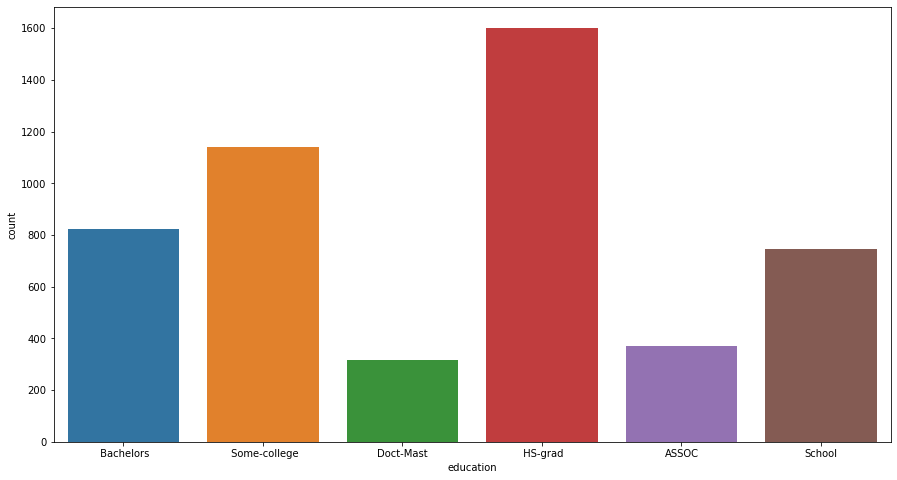

In [199]:
sns.countplot(df['education'])

### 'Education-num'

In [200]:
df['education-num'].value_counts()

9     1602
10    1142
13     823
14     259
11     214
7      179
12     157
6      156
4      105
15      90
5       84
8       57
16      56
3       46
2       25
1        5
Name: education-num, dtype: int64

### 'marital-status'

In [201]:
df['marital-status'].value_counts()

 Married-civ-spouse       2294
 Never-married            1643
 Divorced                  683
 Separated                 159
 Widowed                   150
 Married-spouse-absent      67
 Married-AF-spouse           4
Name: marital-status, dtype: int64

In [202]:
df['marital-status'].unique()

array([' Married-civ-spouse', ' Never-married', ' Separated', ' Divorced',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

<AxesSubplot:xlabel='marital-status', ylabel='count'>

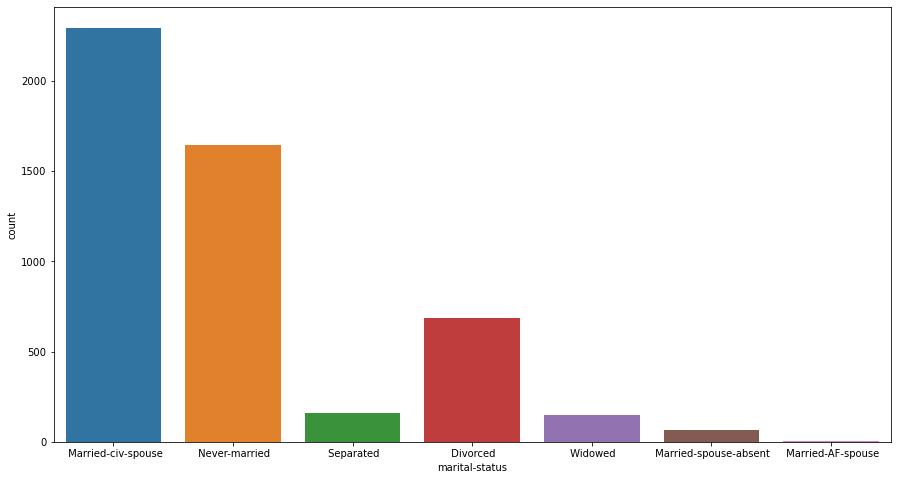

In [203]:
sns.countplot(df['marital-status'])

<AxesSubplot:xlabel='marital-status', ylabel='count'>

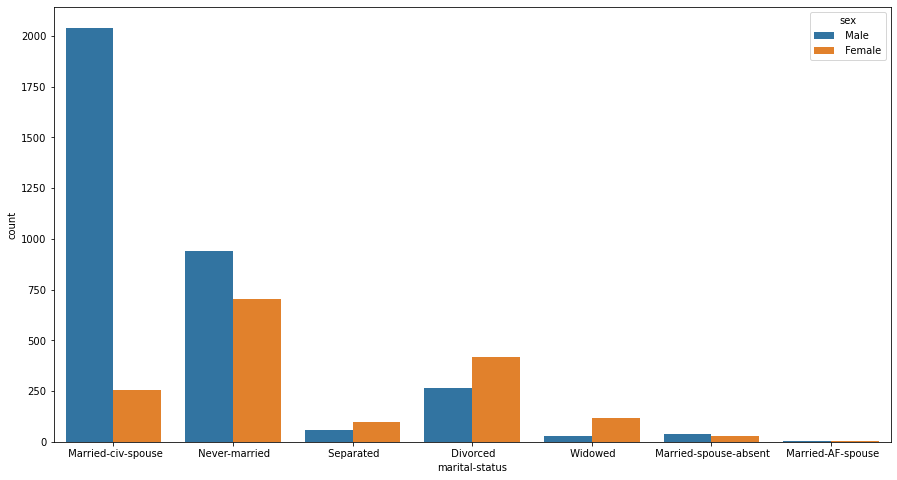

In [204]:
sns.countplot(df['marital-status'], hue=df.sex)

In [205]:
df['marital-status'].unique()

array([' Married-civ-spouse', ' Never-married', ' Separated', ' Divorced',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

combining **' Separated', ' Divorced',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'** into single category **not_married**

In [206]:
df['marital-status'] = df['marital-status'].replace([ ' Separated', ' Divorced', ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'], 'Not_married')

In [207]:
df['marital-status'].value_counts()

 Married-civ-spouse    2294
 Never-married         1643
Not_married            1063
Name: marital-status, dtype: int64

<AxesSubplot:xlabel='marital-status', ylabel='count'>

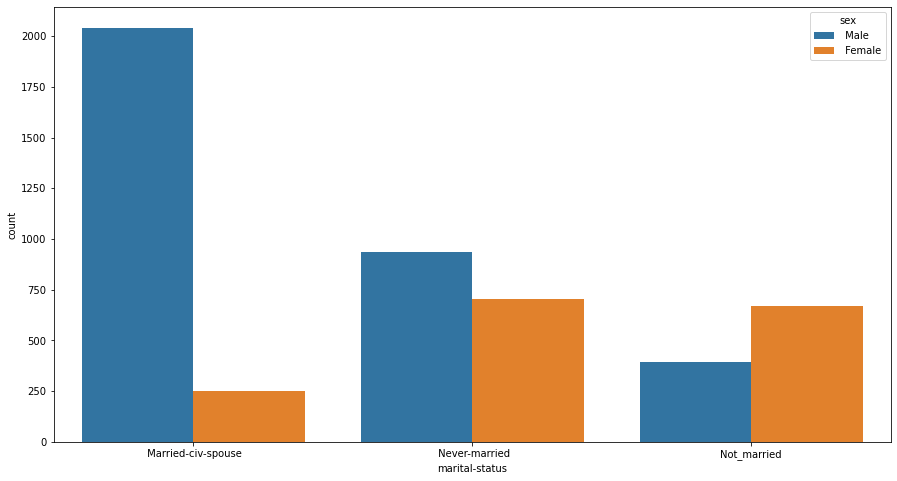

In [208]:
sns.countplot(df['marital-status'], hue=df.sex)

<AxesSubplot:xlabel='marital-status', ylabel='count'>

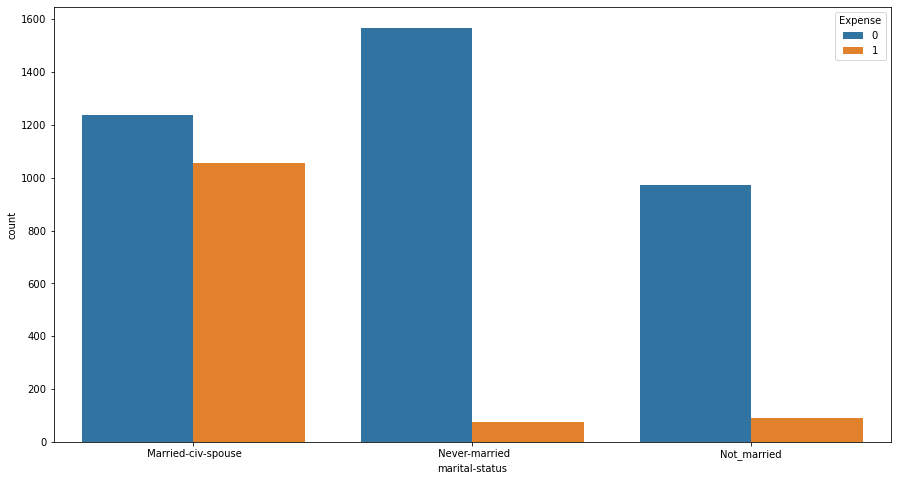

In [209]:
sns.countplot(df['marital-status'], hue=df.Expense)

In [210]:
df.head(3)

age workclass      education  education-num       marital-status  \
0   39    others      Bachelors             13   Married-civ-spouse   
1   20   Private   Some-college             10        Never-married   
2   50   Private      Doct-Mast             16   Married-civ-spouse   

         occupation relationship    race    sex  capital-gain  capital-loss  \
0   Exec-managerial      Husband   White   Male         15024             0   
1     Other-service    Own-child   White   Male             0             0   
2    Prof-specialty      Husband   White   Male             0          1902   

   hours-per-week  native-country  Expense  
0              50   United-States        1  
1              40   United-States        0  
2              65   United-States        1

### 'occupation'

In [211]:
df['occupation'].unique()

array([' Exec-managerial', ' Other-service', ' Prof-specialty',
       ' Adm-clerical', ' Machine-op-inspct', ' Craft-repair', ' Sales',
       ' Transport-moving', ' Handlers-cleaners', ' Tech-support', ' ?',
       ' Priv-house-serv', ' Farming-fishing', ' Protective-serv',
       ' Armed-Forces'], dtype=object)

In [212]:
df['occupation'].value_counts()

 Craft-repair         630
 Prof-specialty       619
 Exec-managerial      609
 Sales                597
 Adm-clerical         588
 Other-service        489
 Machine-op-inspct    323
 ?                    321
 Transport-moving     251
 Handlers-cleaners    191
 Farming-fishing      140
 Tech-support         122
 Protective-serv       99
 Priv-house-serv       20
 Armed-Forces           1
Name: occupation, dtype: int64

In [213]:
pd.crosstab(df['occupation'],df['education'])

education            Bachelors   HS-grad   Some-college  ASSOC  Doct-Mast  \
occupation                                                                  
 ?                          29        87            101     20         14   
 Adm-clerical               81       220            180     66         11   
 Armed-Forces                0         0              1      0          0   
 Craft-repair               34       279            136     51          6   
 Exec-managerial           212       129            133     43         70   
 Farming-fishing            11        55             38      8          1   
 Handlers-cleaners           3        90             36     10          0   
 Machine-op-inspct          11       159             47     18          0   
 Other-service              29       182            128     37          2   
 Priv-house-serv             0        11              1      1          0   
 Prof-specialty            224        31             68     45        169   
 Protective-serv            11        40             27      9          3   
 Sales                     142       182            157     27         29   
 Tech-support               23        25             42     22          6   
 Transport-moving           13       112             47     14          4   

education           School  
occupation                  
 ?                      70  
 Adm-clerical           30  
 Armed-Forces            0  
 Craft-repair          124  
 Exec-managerial        22  
 Farming-fishing        27  
 Handlers-cleaners      52  
 Machine-op-inspct      88  
 Other-service         111  
 Priv-house-serv         7  
 Prof-specialty         82  
 Protective-serv         9  
 Sales                  60  
 Tech-support            4  
 Transport-moving       61

In [214]:
orange = sns.light_palette("orange", as_cmap=True)

In [215]:
pd.crosstab( df['education'],df['occupation']).style.background_gradient(cmap=orange)

In [216]:
df[df['occupation']==' Armed-Forces']

age workclass      education  education-num  marital-status  \
301   29      govt   Some-college             10   Never-married   

        occupation    relationship    race    sex  capital-gain  capital-loss  \
301   Armed-Forces   Not-in-family   Black   Male             0             0   

     hours-per-week  native-country  Expense  
301              60   United-States        0

we can remove this column.

<AxesSubplot:xlabel='occupation', ylabel='count'>

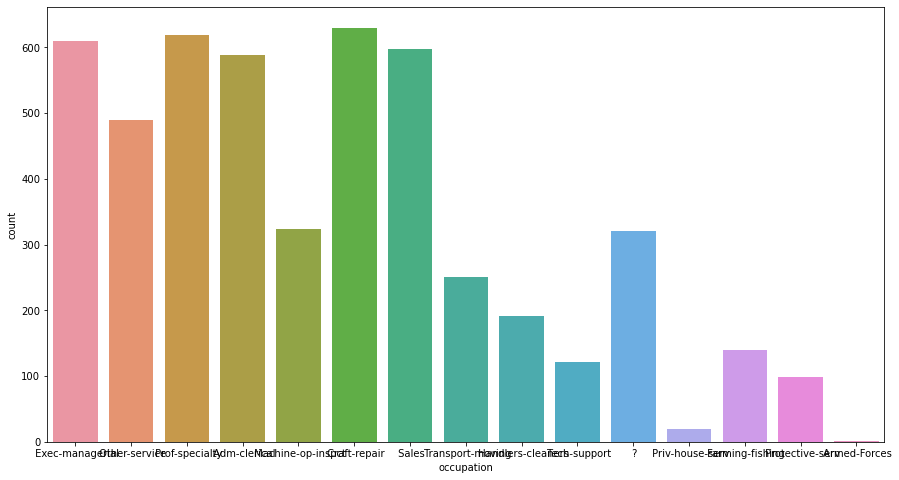

In [217]:
sns.countplot(df['occupation'])

In [218]:
#df = df.drop(index=[301], axis=0)

In [219]:
df['occupation'].unique()

array([' Exec-managerial', ' Other-service', ' Prof-specialty',
       ' Adm-clerical', ' Machine-op-inspct', ' Craft-repair', ' Sales',
       ' Transport-moving', ' Handlers-cleaners', ' Tech-support', ' ?',
       ' Priv-house-serv', ' Farming-fishing', ' Protective-serv',
       ' Armed-Forces'], dtype=object)

In [220]:
df['occupation']= df['occupation'].replace([' Exec-managerial',' Prof-specialty'],'Exec-Prof')
df['occupation']= df['occupation'].replace([' Tech-support', ' ?',' Armed-Forces'], 'Tech-?')
df['occupation']= df['occupation'].replace([' Adm-clerical', ' Machine-op-inspct', ' Craft-repair',' Transport-moving', ' Handlers-cleaners',
                                           ' Priv-house-serv', ' Farming-fishing', ' Protective-serv'],'Strata1')

<AxesSubplot:xlabel='occupation', ylabel='count'>

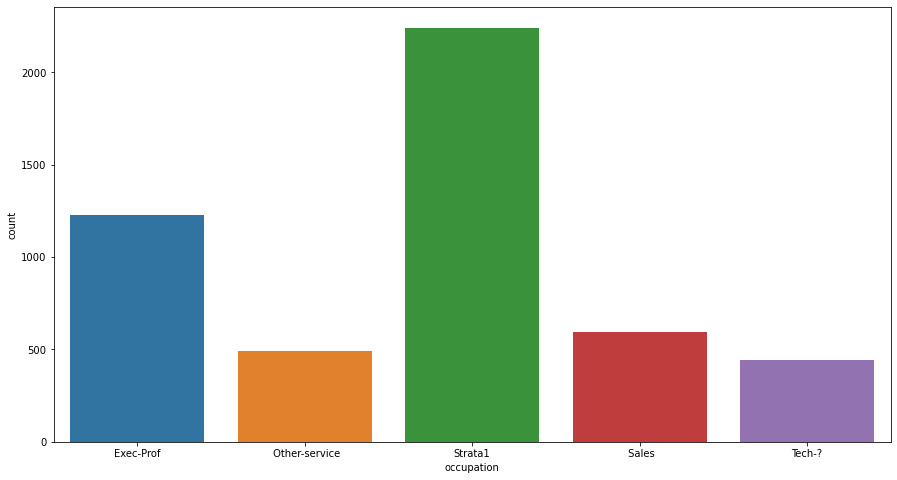

In [221]:
sns.countplot(df['occupation'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

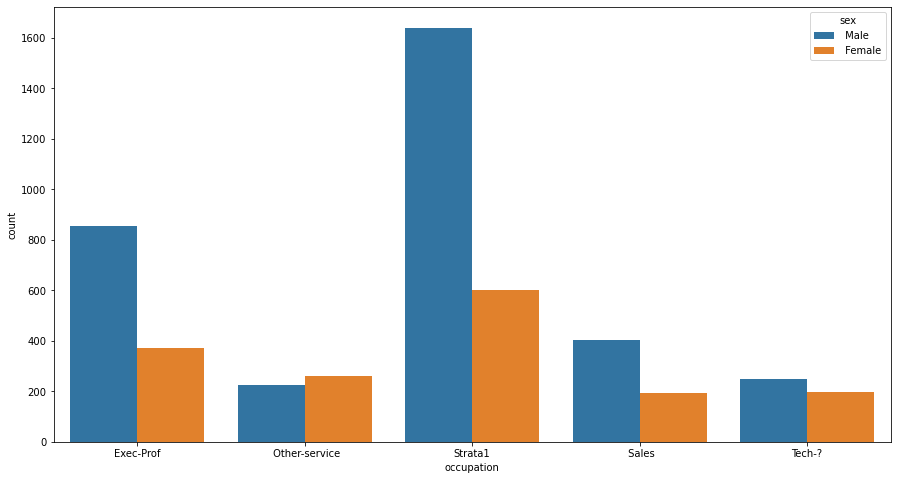

In [222]:
sns.countplot(df['occupation'], hue=df['sex'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

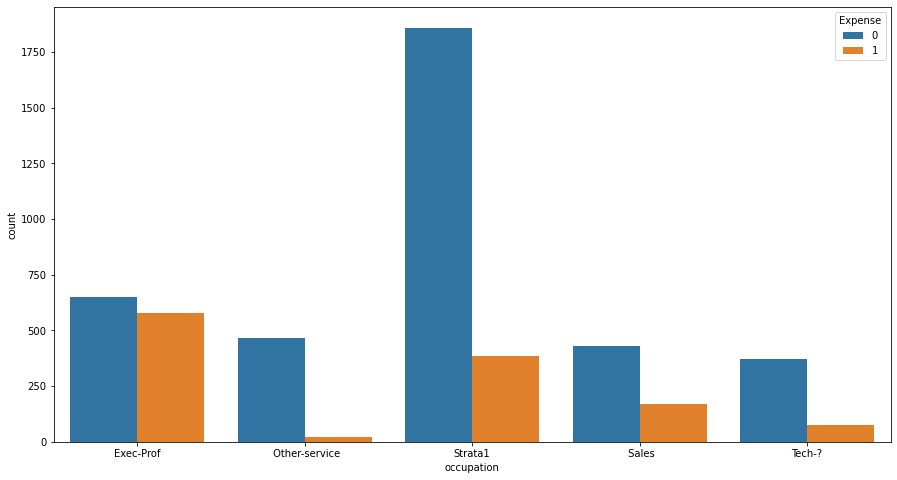

In [223]:
sns.countplot(df['occupation'], hue=df['Expense'])

In [224]:
df.head(2)

age workclass      education  education-num       marital-status  \
0   39    others      Bachelors             13   Married-civ-spouse   
1   20   Private   Some-college             10        Never-married   

       occupation relationship    race    sex  capital-gain  capital-loss  \
0       Exec-Prof      Husband   White   Male         15024             0   
1   Other-service    Own-child   White   Male             0             0   

   hours-per-week  native-country  Expense  
0              50   United-States        1  
1              40   United-States        0

### 'relationship'

In [225]:
df.relationship.value_counts()

 Husband           2026
 Not-in-family     1262
 Own-child          797
 Unmarried          512
 Wife               242
 Other-relative     161
Name: relationship, dtype: int64

In [226]:
df.relationship.unique()

array([' Husband', ' Own-child', ' Wife', ' Not-in-family', ' Unmarried',
       ' Other-relative'], dtype=object)

In [227]:
df.shape

(5000, 14)

<AxesSubplot:xlabel='relationship', ylabel='count'>

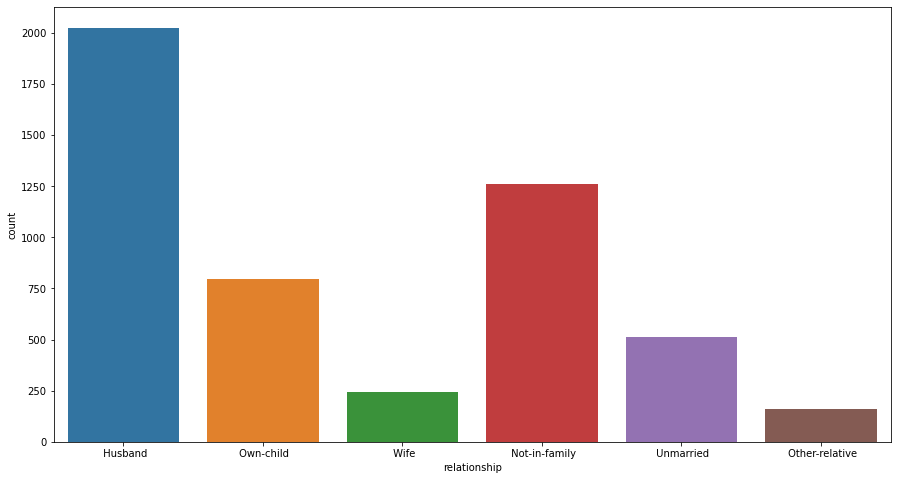

In [228]:
sns.countplot(df['relationship'])

<AxesSubplot:xlabel='relationship', ylabel='count'>

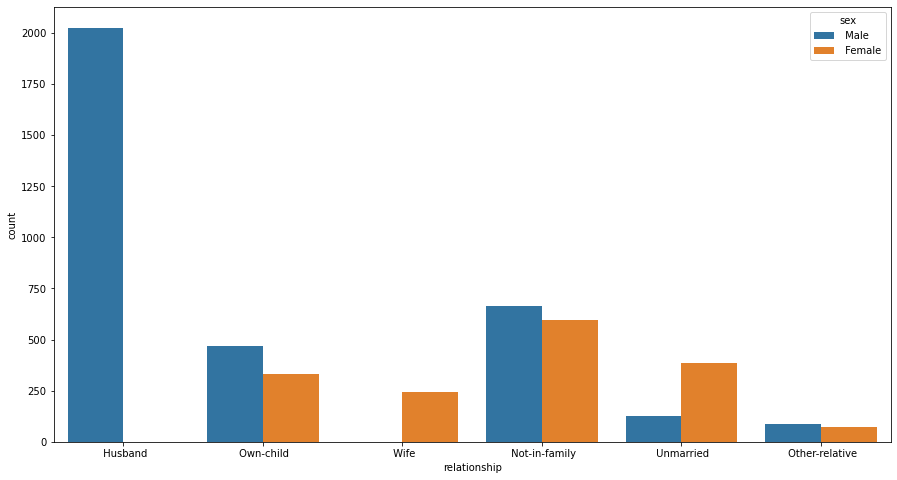

In [229]:
sns.countplot(df['relationship'], hue= df['sex'])

<AxesSubplot:xlabel='relationship', ylabel='count'>

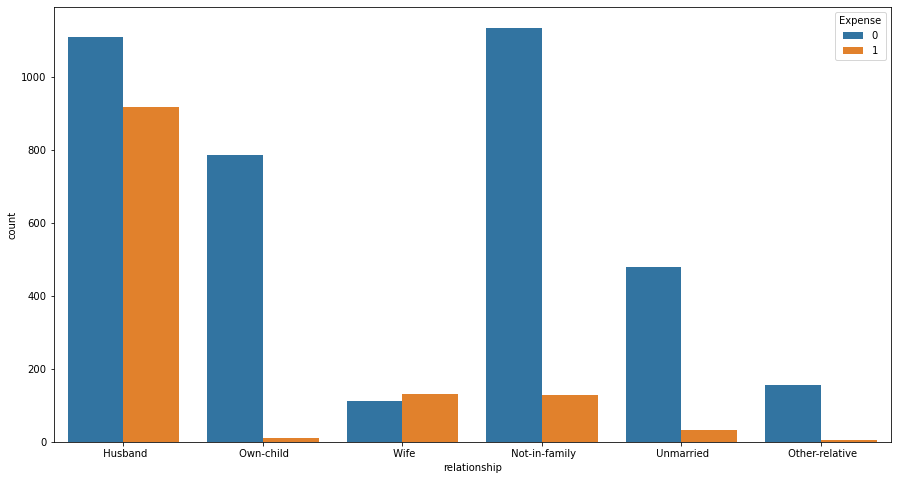

In [230]:
sns.countplot(df['relationship'], hue=df['Expense'])

In [231]:
df[df['relationship']==' Not-in-family'].age.describe()

count   1262.000000
mean      38.430269
std       14.425267
min       17.000000
25%       27.000000
50%       35.000000
75%       47.000000
max       90.000000
Name: age, dtype: float64

In [232]:
df[df['relationship']==' Unmarried'].age.describe()

count   512.000000
mean     40.191406
std      11.341457
min      19.000000
25%      31.000000
50%      40.000000
75%      48.000000
max      76.000000
Name: age, dtype: float64

In [233]:
df['relationship'] = df['relationship'].replace([' Not-in-family',' Unmarried'], ' alone')

<AxesSubplot:xlabel='relationship', ylabel='count'>

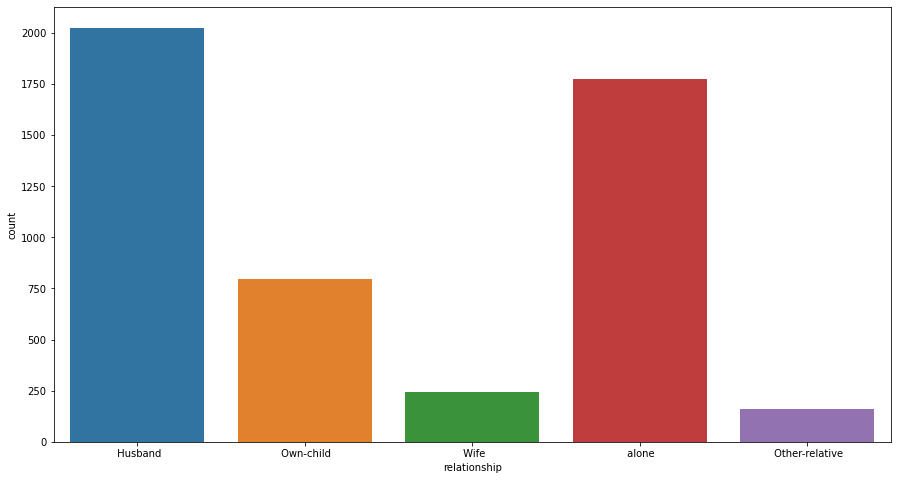

In [234]:
sns.countplot(df['relationship'])

In [235]:
df[df['relationship']==' Other-relative'].age.describe()

count   161.000000
mean     32.490683
std      13.827110
min      17.000000
25%      23.000000
50%      27.000000
75%      39.000000
max      90.000000
Name: age, dtype: float64

### 'Race'

In [236]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [237]:
df.race.value_counts()

 White                 4271
 Black                  490
 Asian-Pac-Islander     153
 Amer-Indian-Eskimo      51
 Other                   35
Name: race, dtype: int64

In [238]:
# race is not so important for finding the expense.

In [239]:
df = df.drop(['race'], axis=1)

In [240]:
df.shape

(5000, 13)

In [241]:
df.head(1)

age workclass   education  education-num       marital-status occupation  \
0   39    others   Bachelors             13   Married-civ-spouse  Exec-Prof   

  relationship    sex  capital-gain  capital-loss  hours-per-week  \
0      Husband   Male         15024             0              50   

   native-country  Expense  
0   United-States        1

### 'sex'

In [242]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [243]:
df['sex'].value_counts()

 Male      3374
 Female    1626
Name: sex, dtype: int64

In [244]:
df['sex'].value_counts()/len(df)*100

 Male     67.480000
 Female   32.520000
Name: sex, dtype: float64

### 'capital-gain'

In [245]:
df['capital-gain'].value_counts()

0        4587
15024      64
7688       48
7298       35
99999      26
5013       16
8614       14
3103       14
3325       13
5178       13
1055        8
10520       7
3137        7
4064        6
4386        6
594         5
6849        5
3411        5
2174        5
4650        5
27828       4
2885        4
2829        4
20051       4
2407        4
14084       4
1506        3
914         3
1409        3
4865        3
7430        3
14344       3
10605       2
6767        2
13550       2
3471        2
2202        2
2977        2
2228        2
3674        2
6514        2
2105        2
4416        2
2597        2
2580        2
3908        2
3464        2
4787        2
4101        2
2354        2
2346        1
7896        1
1471        1
3418        1
10566       1
2062        1
15020       1
1151        1
3818        1
991         1
34095       1
6497        1
22040       1
401         1
2329        1
25124       1
4934        1
2961        1
3273        1
1424        1
3781        1
2176  

In [246]:
df['capital-gain'].describe()

count    5000.000000
mean     1104.080000
std      7579.674371
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max     99999.000000
Name: capital-gain, dtype: float64

<AxesSubplot:xlabel='capital-gain'>

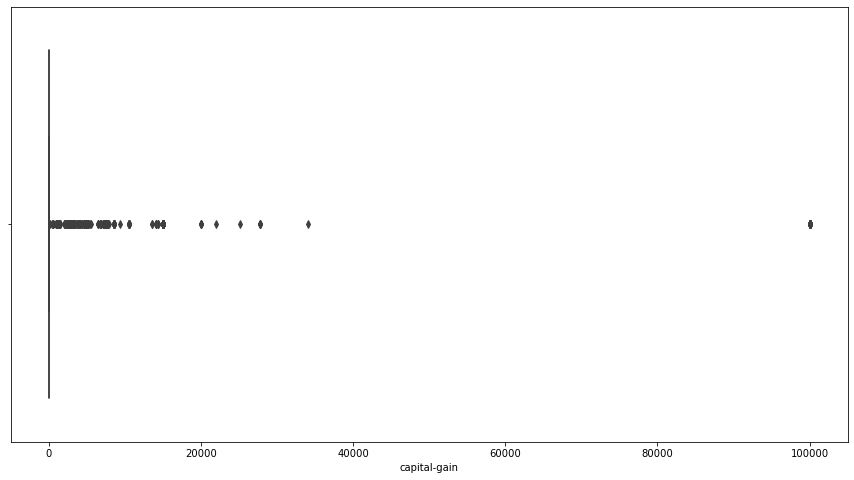

In [247]:
sns.boxplot(df['capital-gain'])

In [248]:
df['capital-loss'].describe()

count   5000.000000
mean      90.032800
std      404.168991
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max     3004.000000
Name: capital-loss, dtype: float64

In [249]:
df['capital-loss'].value_counts()

0       4756
1902      40
1977      29
1887      21
1740      11
1848      10
1590       9
2415       8
1485       8
1672       7
1628       6
1741       6
1719       6
1876       5
1602       4
2001       4
1579       4
1762       4
2002       4
2258       4
1669       4
1564       4
2392       3
2339       3
1980       3
2377       2
2051       2
1340       2
1408       2
625        2
3004       1
1844       1
1651       1
1539       1
419        1
1504       1
2238       1
2206       1
2174       1
2042       1
1668       1
1816       1
1726       1
2205       1
213        1
1594       1
2352       1
1138       1
810        1
2559       1
2547       1
2444       1
2231       1
2179       1
1092       1
2824       1
880        1
Name: capital-loss, dtype: int64

### 'hours-per-week'

In [250]:
df['hours-per-week'].describe()

count   5000.000000
mean      40.566200
std       12.154191
min        1.000000
25%       40.000000
50%       40.000000
75%       45.000000
max       99.000000
Name: hours-per-week, dtype: float64

### 'native-country'

In [251]:
df['native-country'].value_counts()

 United-States                 4459
 Mexico                         102
 ?                               98
 Canada                          31
 Germany                         25
 Philippines                     22
 Puerto-Rico                     17
 El-Salvador                     17
 England                         16
 China                           16
 Cuba                            15
 Jamaica                         14
 Dominican-Republic              13
 Japan                           12
 Vietnam                         12
 Italy                           11
 Poland                          11
 Taiwan                          10
 India                           10
 Guatemala                       10
 South                            9
 Iran                             9
 Greece                           9
 Haiti                            5
 Ireland                          5
 Columbia                         5
 Nicaragua                        5
 Portugal                   

In [252]:
# converting them into continent wise

In [253]:
df['native-country'].unique()

array([' United-States', ' Germany', ' Japan', ' Yugoslavia', ' ?',
       ' India', ' Canada', ' Iran', ' Mexico', ' Taiwan', ' China',
       ' Jamaica', ' Dominican-Republic', ' England', ' Cuba',
       ' Philippines', ' El-Salvador', ' Italy', ' Poland', ' Thailand',
       ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Haiti',
       ' Puerto-Rico', ' Trinadad&Tobago', ' Greece', ' Nicaragua',
       ' South', ' Cambodia', ' Honduras', ' Vietnam', ' Guatemala',
       ' Portugal', ' Hong', ' Columbia', ' Ireland', ' France',
       ' Ecuador', ' Laos'], dtype=object)

In [254]:
# north america

In [255]:
df['native-country'] = df['native-country'].replace([' United-States',' Canada',' Mexico'], 'N-America')

In [256]:
# central and sounth america

In [257]:
df['native-country'] = df['native-country'].replace([' Jamaica',' Dominican-Republic',' Cuba',' El-Salvador',' Peru',
                                                     ' Outlying-US(Guam-USVI-etc)',' Haiti',' Puerto-Rico',
                                                     ' Trinadad&Tobago',' Nicaragua',' Honduras',' Guatemala',' Columbia',
                                                     ' Ecuador'], 'C&S-America')

In [258]:
# europe

In [259]:
df['native-country'] = df['native-country'].replace([' Germany',' Yugoslavia',' England',' Italy',' Poland',' Scotland',' Greece',
                                                    ' Portugal',' Ireland',' France',], 'Europe')

In [260]:
# asia-ocenia

In [261]:
df['native-country'] = df['native-country'].replace([' Japan',' India',' Iran',' Taiwan', ' China',' Philippines',
                                                    ' Thailand',' Cambodia',' Vietnam',' Hong',' Laos',' ?',' South'], 'Asia')

In [262]:
df['native-country'].value_counts()

N-America      4592
Asia            206
C&S-America     115
Europe           87
Name: native-country, dtype: int64

<AxesSubplot:xlabel='native-country', ylabel='count'>

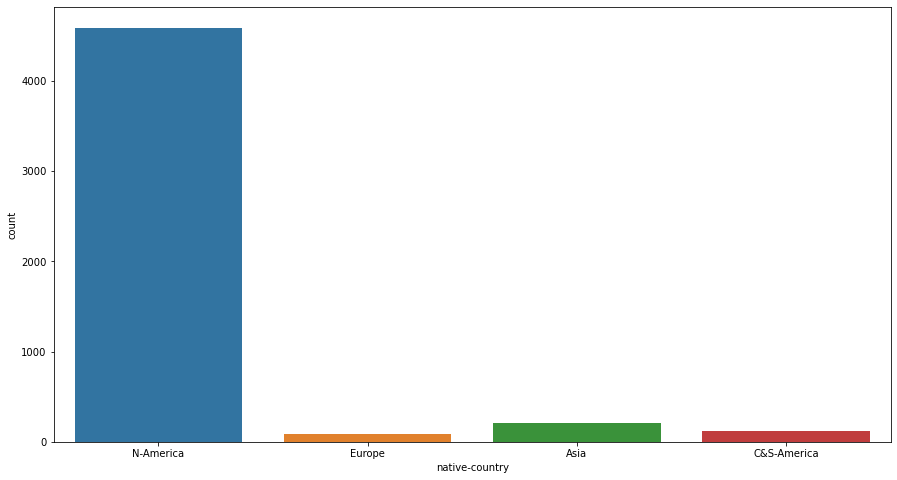

In [263]:
sns.countplot(df['native-country'])

In [264]:
df['native-country'] = df['native-country'].replace(['C&S-America', 'Europe', 'Asia'], 'Non_American')

In [265]:
df['native-country'].value_counts()/len(df)*100

N-America      91.840000
Non_American    8.160000
Name: native-country, dtype: float64

<AxesSubplot:xlabel='native-country', ylabel='count'>

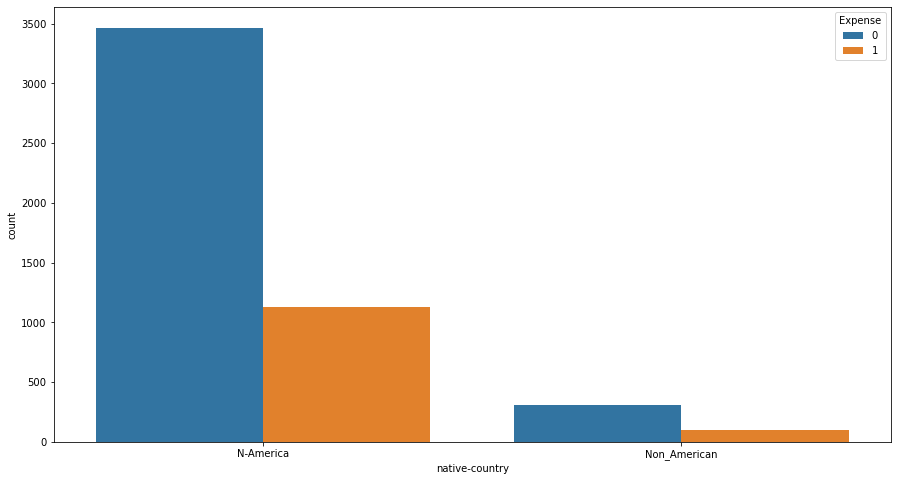

In [266]:
sns.countplot(df['native-country'], hue=df['Expense'])

### 'Expense'

In [267]:
df.Expense.value_counts()

0    3776
1    1224
Name: Expense, dtype: int64

In [268]:
df.Expense.value_counts()/len(df)

0   0.755200
1   0.244800
Name: Expense, dtype: float64

**OUTLIERS**

<AxesSubplot:xlabel='age'>

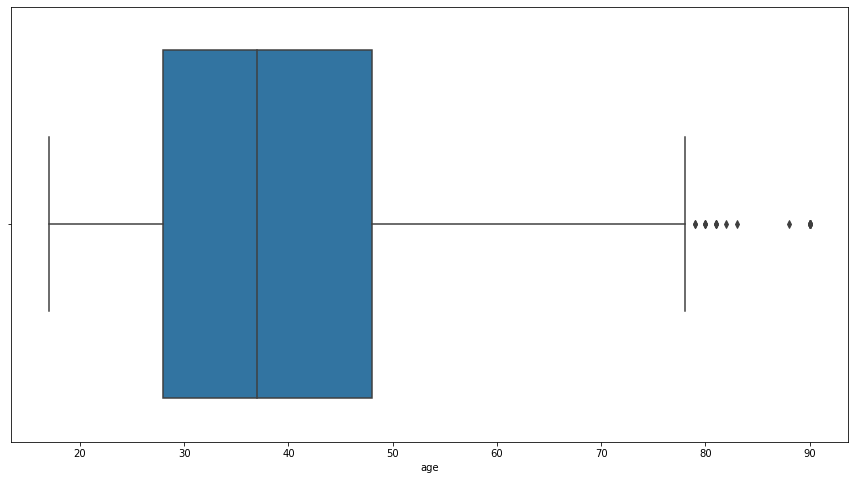

In [269]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='hours-per-week'>

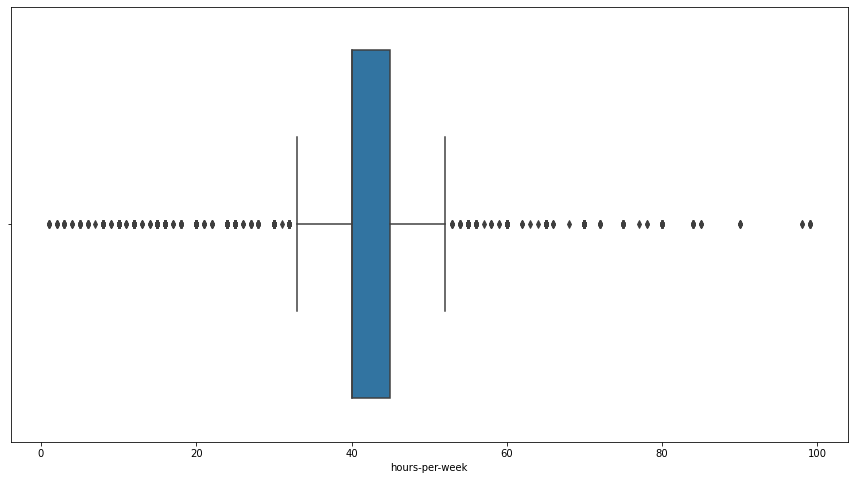

In [270]:
sns.boxplot(df['hours-per-week'])

<AxesSubplot:xlabel='education-num'>

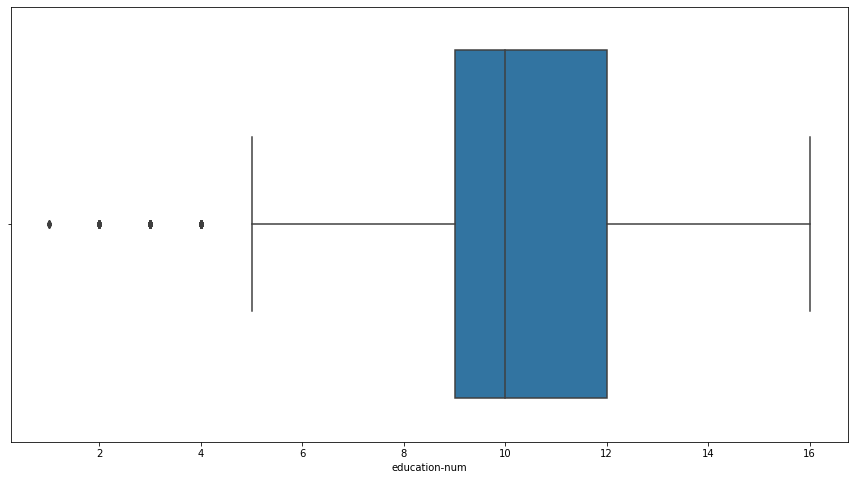

In [271]:
sns.boxplot(df['education-num'])

<AxesSubplot:xlabel='capital-gain'>

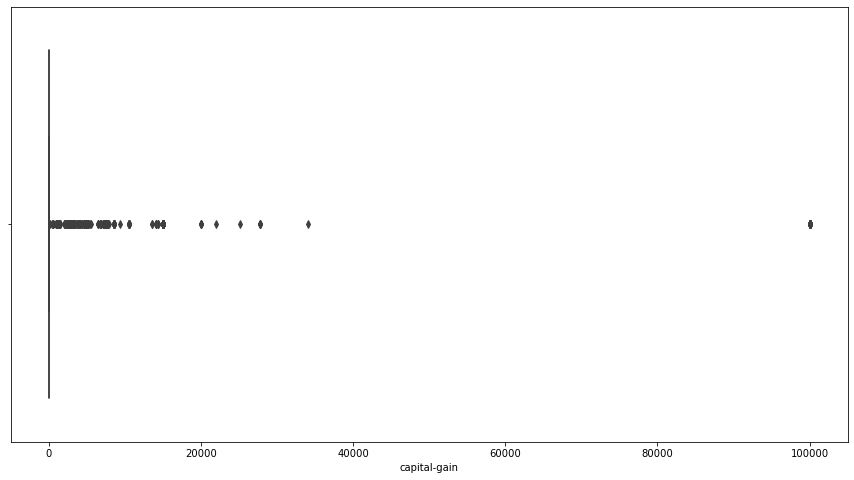

In [272]:
sns.boxplot(df['capital-gain'])

<AxesSubplot:xlabel='capital-loss'>

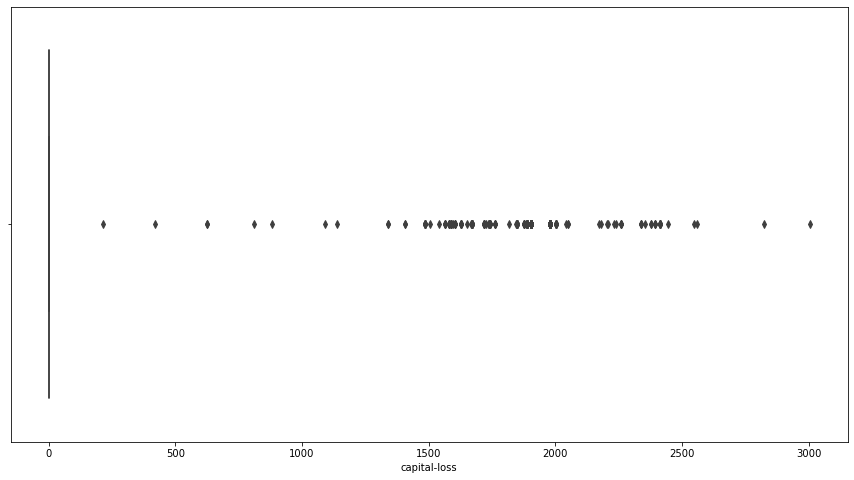

In [273]:
sns.boxplot(df['capital-loss'])

In [274]:
df_shallow = df.copy(deep=True)

In [275]:
# calculate the first quartile
Q1 = df_shallow.quantile(0.25)

# calculate the third quartile
Q3 = df_shallow.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_shallow = df_shallow[~((df_shallow < (Q1 - 1.5 * IQR)) | (df_shallow > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_shallow.shape

(2382, 13)

In [276]:
df_shallow.shape

(2382, 13)

In [277]:
df.shape

(5000, 13)

In [278]:
((4997-2381)/4997)*100

52.3514108465079

so, we can conclude that we can apply IQR method to remove the outliers.

**Without SMOTE**

*scaling on numerical and encoding on categorical**

In [279]:
# defing x and y

In [280]:
df_target = df['Expense']

In [281]:
df_features = df.drop(['Expense'], axis=1)

In [282]:
df_num = df_features.select_dtypes(include=np.number)

In [283]:
df_num.head(2)

age  education-num  capital-gain  capital-loss  hours-per-week
0   39             13         15024             0              50
1   20             10             0             0              40

In [284]:
df_num.shape

(5000, 5)

In [285]:
df_cat = df_features.select_dtypes(include=object)
df_cat.head(1)

workclass   education       marital-status occupation relationship    sex  \
0    others   Bachelors   Married-civ-spouse  Exec-Prof      Husband   Male   

  native-country  
0      N-America

In [286]:
df_cat.shape

(5000, 7)

In [287]:
# scaling on numerical data types

In [288]:
SS = StandardScaler()

In [289]:
num_scaled = SS.fit_transform(df_num)

In [290]:
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [291]:
df_num_scaled.shape

(5000, 5)

In [292]:
# encoding on categorical 

In [293]:
dummy_features = pd.get_dummies(data = df_cat, drop_first=True)

In [294]:
dummy_features.shape

(5000, 19)

In [295]:
# concating the dummy_features and df-num_scaled to form 'X'

In [296]:
x = pd.concat([df_num_scaled,dummy_features], axis=1)

In [297]:
x.head(2)

age  education-num  capital-gain  capital-loss  hours-per-week  \
0  0.025115       1.147432      1.836664     -0.222783        0.776254   
1 -1.362058      -0.025412     -0.145678     -0.222783       -0.046589   

   workclass_govt  workclass_others  education_ HS-grad  \
0               0                 1                   0   
1               0                 0                   0   

   education_ Some-college  education_ASSOC  education_Doct-Mast  \
0                        0                0                    0   
1                        1                0                    0   

   education_School  marital-status_ Never-married  \
0                 0                              0   
1                 0                              1   

   marital-status_Not_married  occupation_ Sales  occupation_Exec-Prof  \
0                           0                  0                     1   
1                           0                  0                     0   

   occupation_Strata1  occupation_Tech-?  relationship_ Other-relative  \
0                   0                  0                             0   
1                   0                  0                             0   

   relationship_ Own-child  relationship_ Wife  relationship_ alone  \
0                        0                   0                    0   
1                        1                   0                    0   

   sex_ Male  native-country_Non_American  
0          1                            0  
1          1                            0

In [298]:
x.shape

(5000, 24)

In [299]:
import statsmodels
import statsmodels.api as sm

In [300]:
x = sm.add_constant(x)

In [301]:
xtrain, xtest, ytrain, ytest = train_test_split(x, df_target, test_size=0.2, random_state=10)

In [302]:
xtrain.shape

(4000, 25)

In [303]:
xtest.shape

(1000, 25)

In [304]:
ytrain.shape

(4000,)

In [305]:
ytest.shape

(1000,)

In [306]:
logreg = sm.Logit(ytrain,xtrain).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.329014
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Expense   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3975
Method:                           MLE   Df Model:                           24
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.4076
Time:                        01:57:49   Log-Likelihood:                -1316.1
converged:                       True   LL-Null:                       -2221.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.3136      0.385     -6.012      0.

In [308]:
# workclass_govt, all education, all relationship but not wife, native, 

In [309]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [310]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(xtest)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(ytest, y_pred),
                                    'Precision Score': metrics.precision_score(ytest, y_pred),
                                    'Recall Score': metrics.recall_score(ytest, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, y_pred),
                                    'f1-score': metrics.f1_score(ytest, y_pred)}, 
                                    ignore_index = True)

In [311]:
update_score_card(logreg,0.5)

In [312]:
print(score_card)

   Probability Cutoff  AUC Score  Precision Score  Recall Score  \
0            0.500000   0.745785         0.780347      0.542169   

   Accuracy Score  Kappa Score  f1-score  
0        0.848000     0.547412  0.639810  


In [317]:
y_pred_prob = logreg.predict(xtest)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [318]:
metrics.roc_auc_score(ytest, y_pred)

0.7457847368167745

In [320]:
accuracy_score(ytest,y_pred)

0.848

In [321]:
cohen_kappa_score(ytest, y_pred)

0.5474116112742149

Cohen suggested the Kappa result be interpreted as follows: values ≤ 0 as indicating no agreement and 0.01–0.20 as none to slight, 0.21–0.40 as fair, 0.41– 0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1.00 as almost perfect agreement.

**good to go**

In [313]:
from sklearn.metrics import confusion_matrix

In [319]:
cm = confusion_matrix(ytest,y_pred)
cm

array([[713,  38],
       [114, 135]], dtype=int64)

In [322]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [324]:
specificity = TN/(TN+FP)
specificity

0.9494007989347537

In [325]:
# sensitivity = TPR

sensitivity = TP/(FN+TP)
sensitivity

0.5421686746987951

In [323]:
from sklearn.metrics import roc_curve, roc_auc_score

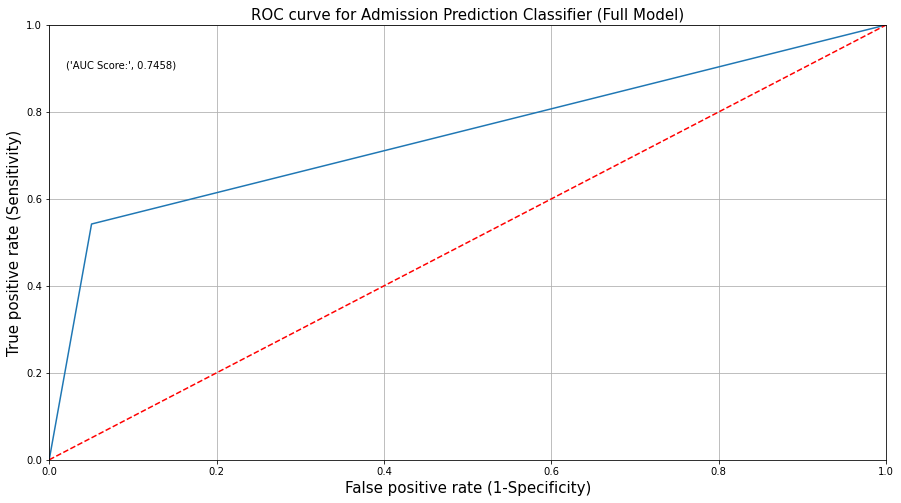

In [329]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(ytest, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred),4)))
                               
# plot the grid
plt.grid(True)

In [330]:
from pandas_profiling import ProfileReport

In [331]:
ProfileReport(x)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]